In [1]:
# after the students have compared the effect of different methods, they could decide on their preferred model
#afterwards, they could test the assumptions of Linear Regression


In [94]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [95]:
pd.set_option('display.max_columns', None)
dataset = pd.read_csv(r'C:\Users\mtsil\OneDrive\Documents\file.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
new_df = dataset[['GrLivArea', 'SalePrice']]
new_df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [97]:
new_df[["GrLivArea", "SalePrice"]] = pd.DataFrame(
    np.log(new_df[["GrLivArea", "SalePrice"]]), columns=["GrLivArea", "SalePrice"]
)

C:\Users\mtsil\AppData\Local\Temp\ipykernel_29384\1705282101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[["GrLivArea", "SalePrice"]] = pd.DataFrame(


In [99]:
from sklearn import preprocessing


scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(new_df)
robust_df = pd.DataFrame(robust_df, columns =['GrLivArea', 'SalePrice'])
robust_df.head()

,GrLivArea,SalePrice
0,0.342864,0.493727
1,-0.327751,0.215600
2,0.438855,0.633052
3,0.351882,-0.305049
4,0.897055,0.857765


In [100]:
import statsmodels.formula.api as smf 
model = smf.ols(formula='GrLivArea ~ SalePrice', 
                data=robust_df).fit() 
  

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:              GrLivArea   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1666.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.60e-243
Time:                        17:05:12   Log-Likelihood:                -1067.9
No. Observations:                1460   AIC:                             2140.
Df Residuals:                    1458   BIC:                             2150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0770      0.013     -5.841      0.0

Text(0.5, 1.0, 'GrLiv Area vs Sale Price')

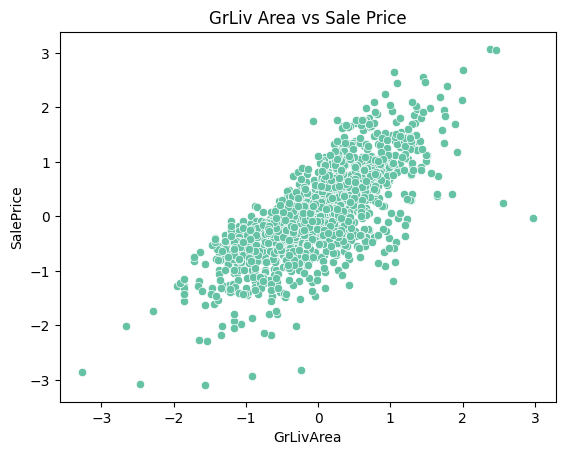

In [101]:
a= sns.scatterplot(x='GrLivArea',y='SalePrice',data=robust_df)

a.set_title('GrLiv Area vs Sale Price')

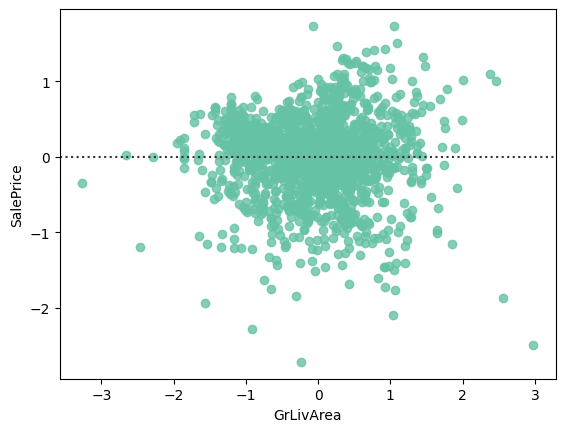

In [102]:
sns.set_palette('Set2')

sns.residplot(data=robust_df, x='GrLivArea', y='SalePrice')
plt.show()

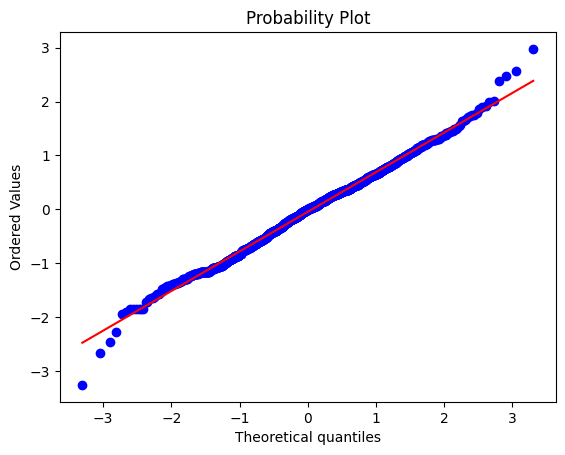

In [103]:
# testing assumption 4

normality = stats.probplot(robust_df['GrLivArea'], plot=plt)


plt.show()

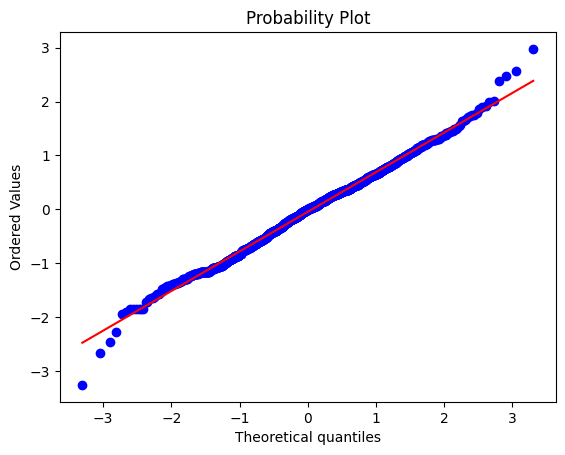

In [104]:
# testing assumption 4

normality = stats.probplot(robust_df['GrLivArea'], plot=plt)


plt.show()

In [105]:
X = robust_df[['GrLivArea']]
y = robust_df[['SalePrice']]

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [107]:
model.fit(X_train, y_train)

LinearRegression()

In [108]:
model.score(X_test, y_test)

0.5620784879109358